In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from tqdm import tqdm

In [0]:
from librosa import display
import librosa

In [4]:
#feature set
#This voice is of a Triloki
# Load the audio as a waveform `y`
# Store the sampling rate as `sr`
y,sr=librosa.load("drive/My Drive/Voice/Triloki/Triloki_1.wav")
mfccs = librosa.feature.mfcc(y, sr, n_mfcc=40)
melspectrogram =librosa.feature.melspectrogram(y=y, sr=sr, n_mels=40,fmax=8000)
chroma_stft=librosa.feature.chroma_stft(y=y, sr=sr,n_chroma=40)
chroma_cq =librosa.feature.chroma_cqt(y=y, sr=sr,n_chroma=40)
chroma_cens =librosa.feature.chroma_cens(y=y, sr=sr,n_chroma=40)
melspectrogram.shape,chroma_stft.shape,chroma_cq.shape,chroma_cens.shape,mfccs.shape

((40, 112), (40, 112), (40, 112), (40, 112), (40, 112))

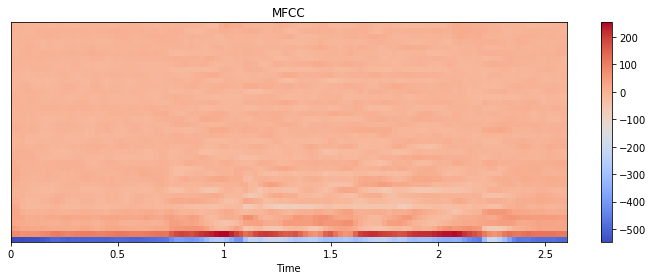

In [5]:
#MFCC of Triloki's voice
import matplotlib.pyplot as plt
plt.figure(figsize=(10,4))
librosa.display.specshow(mfccs, x_axis='time')
plt.colorbar()
plt.title('MFCC')
plt.tight_layout()
#print(mfccs)

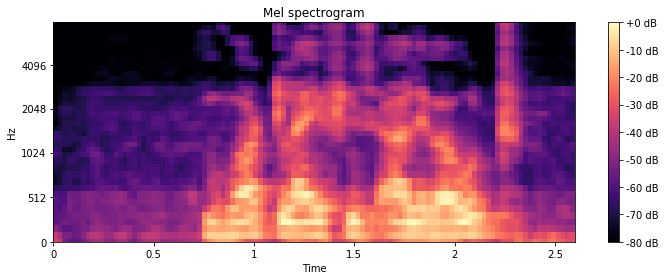

In [6]:
#Melspectrogram of Triloki's voice
plt.figure(figsize=(10,4))
librosa.display.specshow(librosa.power_to_db(melspectrogram,ref=np.max),y_axis='mel', fmax=8000,x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel spectrogram')
plt.tight_layout()

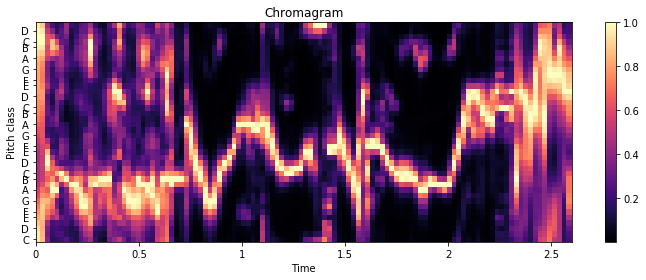

In [7]:
#Chromagram of Triloki's voice
plt.figure(figsize=(10,4))
librosa.display.specshow(chroma_stft, y_axis='chroma', x_axis='time')
plt.colorbar()
plt.title('Chromagram')
plt.tight_layout()

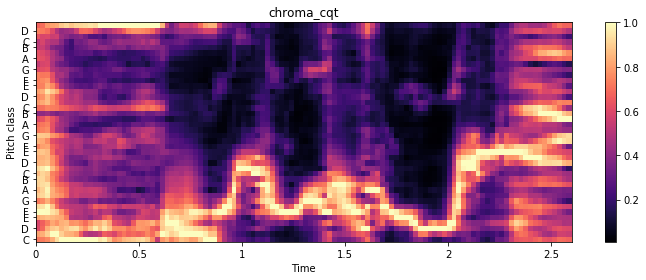

In [8]:
#Chroma cqt of Triloki's voice
plt.figure(figsize=(10,4))
librosa.display.specshow(chroma_cq, y_axis='chroma', x_axis='time')
plt.colorbar()
plt.title('chroma_cqt')
plt.tight_layout()

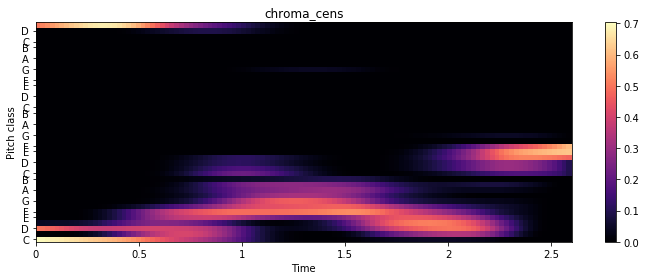

In [9]:
#Chroma cens of a Triloki's voice
plt.figure(figsize=(10,4))
librosa.display.specshow(chroma_cens, y_axis='chroma', x_axis='time')
plt.colorbar()
plt.title('chroma_cens')
plt.tight_layout()

In [10]:
#feature set
y,sr=librosa.load("drive/My Drive/Voice/Triloki/Triloki_16.wav")
mfccs = np.mean(librosa.feature.mfcc(y, sr, n_mfcc=40).T,axis=0)
melspectrogram = np.mean(librosa.feature.melspectrogram(y=y, sr=sr, n_mels=40,fmax=8000).T,axis=0)
chroma_stft=np.mean(librosa.feature.chroma_stft(y=y, sr=sr,n_chroma=40).T,axis=0)
chroma_cq = np.mean(librosa.feature.chroma_cqt(y=y, sr=sr,n_chroma=40).T,axis=0)
chroma_cens = np.mean(librosa.feature.chroma_cens(y=y, sr=sr,n_chroma=40).T,axis=0)
melspectrogram.shape,chroma_stft.shape,chroma_cq.shape,chroma_cens.shape,mfccs.shape

((40,), (40,), (40,), (40,), (40,))

In [11]:
#stacking and reshaping
features=np.reshape(np.vstack((mfccs,melspectrogram,chroma_stft,chroma_cq,chroma_cens)),(40,5))
print(features.shape)
for i in range(40):
  print(features[i])

(40, 5)
[-329.73654466  125.16781012   13.06916768   33.33712888   29.38109309]
[ 10.43699448 -38.21614273  -7.45586033  -3.35169029 -13.21149524]
[ -4.81216926   4.87709731 -10.59645959   0.25516508  -3.18642993]
[-8.15662812 -6.09324169 -3.92963199 -6.5867836  -5.99110509]
[-3.30498942  0.83259708 -1.38090213  1.83558108 -1.29460457]
[-3.33200618 -3.24958731 -1.53155642 -2.93797308 -5.6147449 ]
[-3.98470036 -5.35596157 -3.48309532 -3.71338975 -1.34320746]
[-4.08148101 -3.4047888  -2.56198804 -0.66662671 -1.03488813]
[ 1.16277263 10.16589751  4.65559158 32.64188022  6.86084262]
[ 2.979547   13.03846696  9.70151962  0.94560177  0.10255166]
[0.06391577 0.03966283 0.03298094 0.01523335 0.00630767]
[0.01676159 0.01945068 0.01327336 0.02981454 0.06745656]
[0.07742197 0.06381394 0.05740383 0.03276519 0.01848006]
[0.0242435  0.01206028 0.00199915 0.00047361 0.00068747]
[0.00138644 0.00213879 0.00335924 0.0064834  0.00547388]
[0.00495513 0.00652777 0.00517799 0.00500429 0.00506993]
[0.1816821

In [12]:
#preprocessing using only mfcc
x_train=[]
x_test=[]
y_train=[]
y_test=[]
path = 'drive/My Drive/Voice'
 
files = os.listdir(path)
for name in tqdm(files):
    
  filename = path+"/"+name
  #print(filename)
  files1 = os.listdir(filename)
  for name1 in files1:
      #print(filename+"/"+name1)
      filename1 = filename+"/"+name1
      y,sr=librosa.load(filename1)
      mfccs = np.mean(librosa.feature.mfcc(y, sr, n_mfcc=40).T,axis=0)
      melspectrogram = np.mean(librosa.feature.melspectrogram(y=y, sr=sr, n_mels=40,fmax=8000).T,axis=0)
      chroma_stft=np.mean(librosa.feature.chroma_stft(y=y, sr=sr,n_chroma=40).T,axis=0)
      chroma_cq = np.mean(librosa.feature.chroma_cqt(y=y, sr=sr,n_chroma=40).T,axis=0)
      chroma_cens = np.mean(librosa.feature.chroma_cens(y=y, sr=sr,n_chroma=40).T,axis=0)
      features=np.reshape(np.vstack((mfccs,melspectrogram,chroma_stft,chroma_cq,chroma_cens)),(40,5))
      x_train.append(features)
      y_train.append(name)

100%|██████████| 7/7 [10:53<00:00, 95.59s/it]


In [13]:
len(x_train), len(y_train)

(601, 601)

In [14]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(y_train)


LabelEncoder()

In [15]:
list(le.classes_)

['Bhanu', 'Dheerendra', 'Irshad', 'Jaydeep', 'Rohit', 'Shashi', 'Triloki']

In [0]:
y_train1 = le.transform(y_train) 

In [17]:
le.inverse_transform([0, 1, 2, 3])

array(['Bhanu', 'Dheerendra', 'Irshad', 'Jaydeep'], dtype='<U10')

In [0]:
#converting the lists into numpy arrays
x_train=np.array(x_train)
y_train=np.array(y_train1)

In [19]:
x_train.shape, y_train.shape

((601, 40, 5), (601,))

In [20]:
#reshaping into 2d to save in csv format
x_train_2d=np.reshape(x_train,(x_train.shape[0],x_train.shape[1]*x_train.shape[2]))
x_train_2d.shape

(601, 200)

In [0]:
from sklearn.model_selection import train_test_split
x_train_2d, x_test_2d, y_train, y_test = train_test_split(x_train_2d, y_train, test_size = 0.2, random_state = 0)

In [0]:
#saving the data numpy arrays
np.savetxt("train_data1.csv", x_train_2d, delimiter=",")
np.savetxt("test_data1.csv",x_test_2d,delimiter=",")
np.savetxt("train_labels1.csv",y_train,delimiter=",")
np.savetxt("test_labels1.csv",y_test,delimiter=",")

In [23]:
x_train_2d.shape, y_train.shape, x_test_2d.shape, y_test.shape

((480, 200), (480,), (121, 200), (121,))

In [0]:
#downloading the saved data from colab's server
from google.colab import files

files.download("train_data1.csv")
files.download("test_data1.csv")
files.download("train_labels1.csv")
files.download("test_labels1.csv")